<a href="https://colab.research.google.com/github/zharsuke/PCVK_Ganjil_2024/blob/master/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TUGAS PRAKTIKUM

1. Buat Gamma Correction sesuai dengan petunjuk berikut
Percobaan ini akan meminta anda membuat Gamma Correction. Pada percobaan ini, nilai
Gamma akan diset dengan meminta masukan dari pengguna. Berikut adalah kode untuk
meminta masukan nilai dari pengguna. Lanjutkan kode tersebut dengan membuat image
dengan gamma correction sesuai rumus yang telah diberikan.

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


Text(0.5, 1.0, 'Gamma Correction')

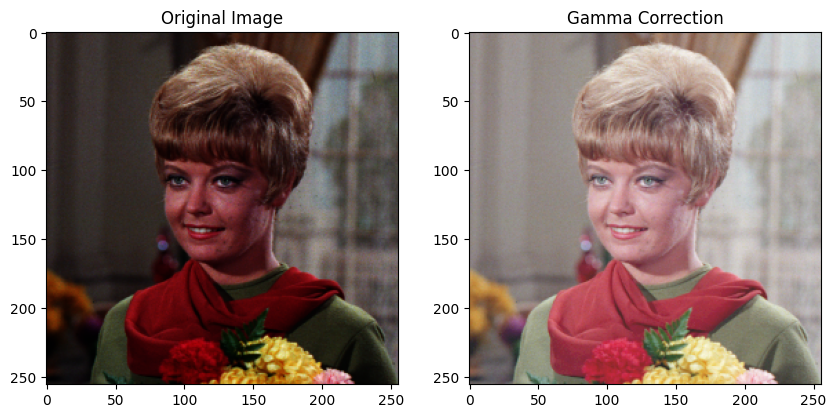

In [19]:
import cv2 as cv
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np
img = cv.imread('/content/drive/MyDrive/pcvk/female.tiff')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')


def gammaCorrection(img, gamma):
  img = 255 * (img / 255) ** (1/gamma)
  return np.clip(img, 0, 255).astype(np.uint8)

img_gamma = gammaCorrection(img, gamma)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(img)
ax[0].set_title('Original Image')

ax[1].imshow(img_gamma)
ax[1].set_title('Gamma Correction')



2. Buat Simulasi Image Depth
Percobaan ini digunakan sebagai simulasi dari proses kuantisasi citra. Pada kuantisasi citra, pixel dapat direpresentasikan dengan n-bit kedalaman (default menggunakan 8-bit). Pada pixel 8-bit, warna yang memungkinkan adalah 256 warna, dari 0 (0000 0000) hingga 255(1111 1111). Pada pixel 7-bit, warna yang memungkinkan adalah 128 warna, dari 0 (0000 000) hingga 127 (111 1111). Kemungkinan warna didapat dari pangkat 2 jumlah bit. Jika 7bit, maka jumlah warnanya adalah 2^7 = 128, dst.

Berikut adalah kode untuk membaca citra masukan dan memberi nilai kedalaman citra, silahkan lanjutkan kode program berikut sehingga menghasilkan keluaran seperti contoh pada Gambar.

Text(0.5, 1.0, 'Depth Image')

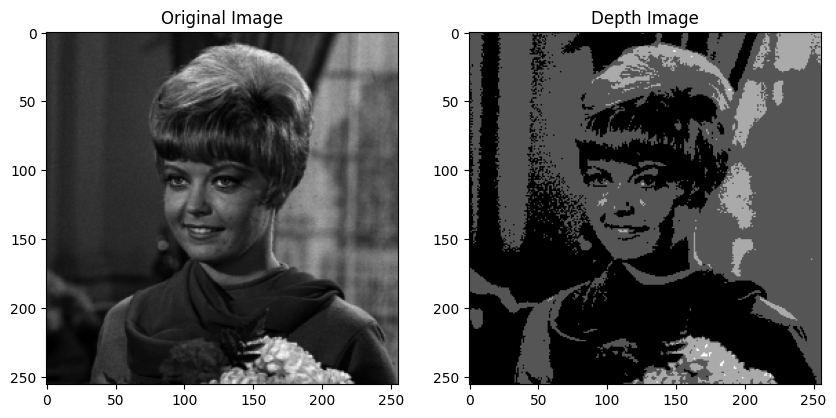

In [20]:
bit_depth=2
level = 255 / (pow(2,bit_depth)-1)
original = cv.imread('/content/drive/MyDrive/pcvk/female.tiff', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape, original.dtype)

def bitDepthReduction(img, level):
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      depth_image[i, j] = level * round(img[i, j] / level)
  return depth_image

depthImage = bitDepthReduction(original, level)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(original, cmap='gray')
ax[0].set_title('Original Image')

ax[1].imshow(depthImage, cmap='gray')
ax[1].set_title('Depth Image')

3. Buat modul average denoising sesuai dengan rumus yang telah diberikan pada sub bab sebelumnya. Citra asli sudah disediakan pada /images/galaxy.jpg. 100 Citra dengan Gaussian Noise sudah disediakan pada /images/noises/*.jpg Anda dapat menggunakan code berikut untuk membaca semua image dalam satu folder , gunakan modul glob (import glob).

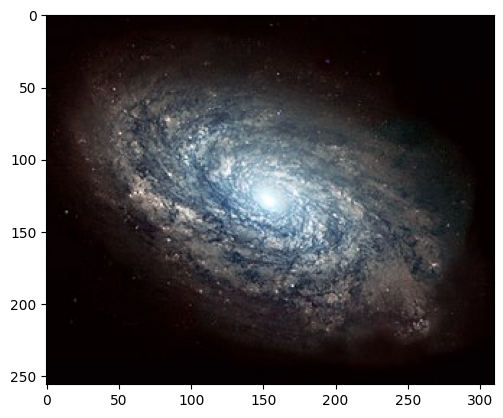

In [26]:
import glob

cvImg = []

for img in glob.glob('/content/drive/MyDrive/pcvk/noises/*.jpg'):
  n = cv.imread(img)
  cvImg.append(n)

galaxyOri = cv.imread('/content/drive/MyDrive/pcvk/galaxy.jpg', cv.COLOR_BGR2RGB)
plt.imshow(galaxyOri)

def pnsr(original, noise):
    mse = np.mean((original - noise) ** 2)
    if mse == 0:
        return 100
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

def averageDenoising(img, amount):
    sumImage = np.zeros(img[0].shape, np.float64)
    for i in range(amount):
        sumImage = sumImage + img[i]
    averageImage = sumImage / amount
    return np.clip(averageImage, 0, 255).astype(np.uint8)

average_5 = averageDenoising(cvImg, 5)
average_10 = averageDenoising(cvImg, 10)
average_20 = averageDenoising(cvImg, 20)
average_40 = averageDenoising(cvImg, 40)
average_80 = averageDenoising(cvImg, 80)
average_100 = averageDenoising(cvImg, 100)

psnr_5 = pnsr(galaxyOri, average_5)
psnr_10 = pnsr(galaxyOri, average_10)
psnr_20 = pnsr(galaxyOri, average_20)
psnr_40 = pnsr(galaxyOri, average_40)
psnr_80 = pnsr(galaxyOri, average_80)
psnr_100 = pnsr(galaxyOri, average_100)

PSNR Average 5 Image:  27.53497365961995
PSNR Average 10 Image:  27.544716724563045
PSNR Average 20 Image:  27.506082345858832
PSNR Average 40 Image:  27.452595611811226
PSNR Average 80 Image:  27.40408595226529
PSNR Average 100 Image:  27.370931279516654


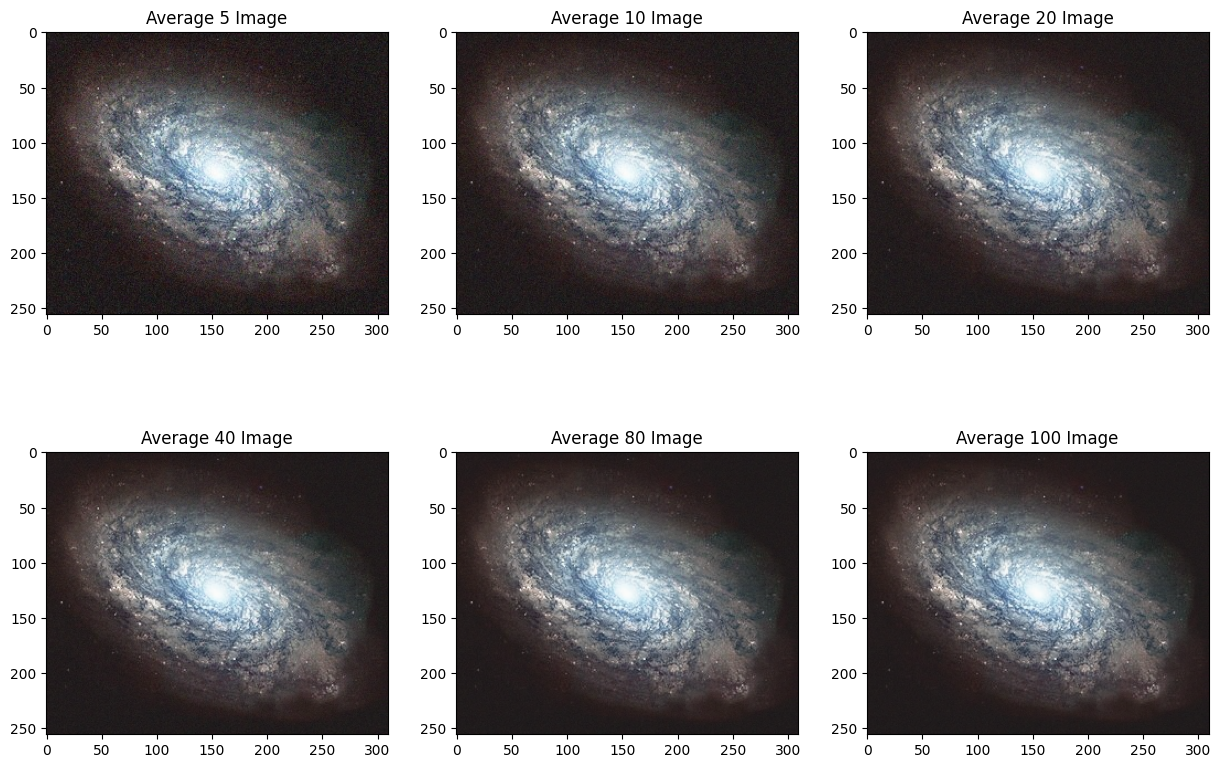

In [24]:
print('PSNR Average 5 Image: ', psnr_5)
print('PSNR Average 10 Image: ', psnr_10)
print('PSNR Average 20 Image: ', psnr_20)
print('PSNR Average 40 Image: ', psnr_40)
print('PSNR Average 80 Image: ', psnr_80)
print('PSNR Average 100 Image: ', psnr_100)

fig, ax = plt.subplots(2, 3, figsize=(15, 10))

ax[0, 0].imshow(average_5)
ax[0, 0].set_title('Average 5 Image')

ax[0, 1].imshow(average_10)
ax[0, 1].set_title('Average 10 Image')

ax[0, 2].imshow(average_20)
ax[0, 2].set_title('Average 20 Image')

ax[1, 0].imshow(average_40)
ax[1, 0].set_title('Average 40 Image')

ax[1, 1].imshow(average_80)
ax[1, 1].set_title('Average 80 Image')

ax[1, 2].imshow(average_100)
ax[1, 2].set_title('Average 100 Image')

plt.show()

Dari hasil PSNR yang anda catat pada tabel diatas, kesimpulan yang dapat diambil adalah:

Metode rata-rata bekerja baik untuk denoising dengan mengurangi noise secara bertahap ketika lebih banyak citra digunakan.
Namun, hasil menunjukkan bahwa ada batas efektivitas dari metode ini, di mana penambahan citra tidak selalu meningkatkan kualitas citra denoising. Setelah sekitar 10 citra, peningkatan PSNR menjadi sangat kecil atau bahkan menurun.
Ini mungkin disebabkan oleh noise yang ada pada citra tidak bisa sepenuhnya dihilangkan hanya dengan metode rata-rata, sehingga metode lain mungkin diperlukan untuk hasil yang lebih optimal.

4. Buat image masking untuk image berikut. Image kiri adalah image asli (image KTP), sedangkan image paling kanan adalah hasilnya:

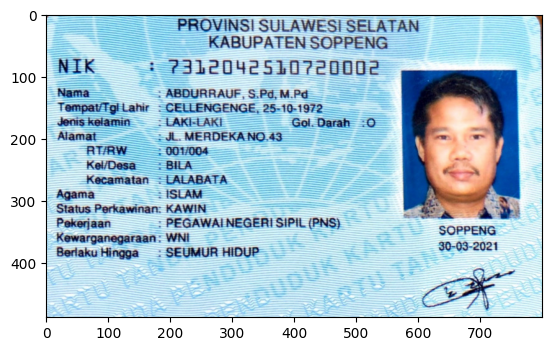

In [27]:
ktp = cv.imread('/content/drive/MyDrive/pcvk/KTP7.jpeg')
ktp = cv.cvtColor(ktp, cv.COLOR_BGR2RGB)
plt.imshow(ktp)

Text(0.5, 1.0, 'Image Masking')

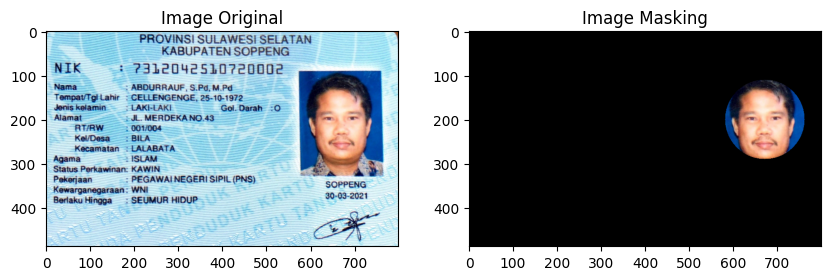

In [28]:
mask = np.zeros(ktp.shape[:2], dtype="uint8")
cv.circle(mask, (670, 200), 90, 200, -1)
masked_image_face = cv.bitwise_and(ktp, ktp, mask=mask)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(ktp)
ax[0].set_title('Image Original')

ax[1].imshow(masked_image_face)
ax[1].set_title('Image Masking')

Text(0.5, 1.0, 'Citra Masking')

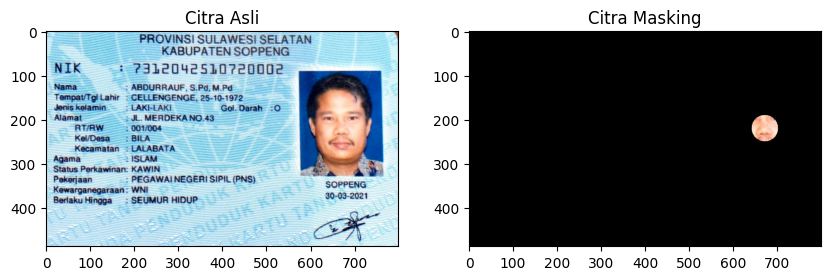

In [29]:
mask = np.zeros(ktp.shape[:2], dtype="uint8")
cv.circle(mask, (670, 220), 30, 200, -1)
masked_image_nose = cv.bitwise_and(ktp, ktp, mask=mask)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(ktp)
ax[0].set_title('Image Original')

ax[1].imshow(masked_image_nose)
ax[1].set_title('Image Masking')

Text(0.5, 1.0, 'Citra Masking')

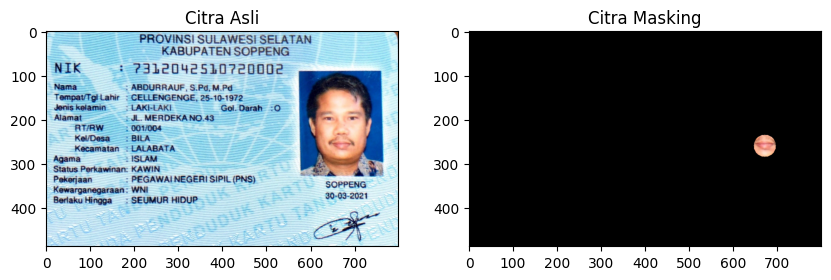

In [30]:
mask = np.zeros(ktp.shape[:2], dtype="uint8")
cv.circle(mask, (670, 260), 25, 200, -1)
masked_image_mouth = cv.bitwise_and(ktp, ktp, mask=mask)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(ktp)
ax[0].set_title('Image Original')

ax[1].imshow(masked_image_mouth)
ax[1].set_title('Image Masking')

Text(0.5, 1.0, 'Image Masking')

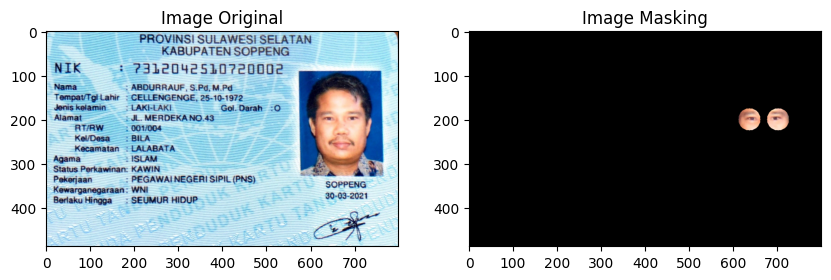

In [38]:
mask = np.zeros(ktp.shape[:2], dtype="uint8")
cv.circle(mask, (635, 200), 25, 200, -1)
cv.circle(mask, (700, 200), 25, 200, -1)
masked_image_eye = cv.bitwise_and(ktp, ktp, mask=mask)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(ktp)
ax[0].set_title('Image Original')

ax[1].imshow(masked_image_eye)
ax[1].set_title('Image Masking')

Text(0.5, 1.0, 'Image Masking')

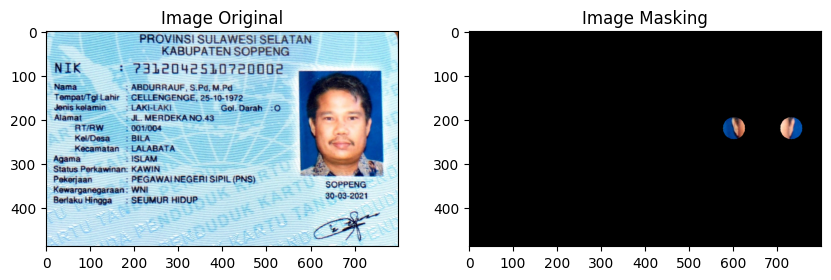

In [37]:
mask = np.zeros(ktp.shape[:2], dtype="uint8")
cv.circle(mask, (600, 220), 25, 200, -1)
cv.circle(mask, (730, 220), 25, 200, -1)
masked_image_ears = cv.bitwise_and(ktp, ktp, mask=mask)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(ktp)
ax[0].set_title('Image Original')

ax[1].imshow(masked_image_ears)
ax[1].set_title('Image Masking')

5. Lakukan percobaan menggunakan operator lain dan tunjukkan hasilnya pada modul ini. Tuliskan hasil analisa anda kenapa citra keluarannya seperti itu.

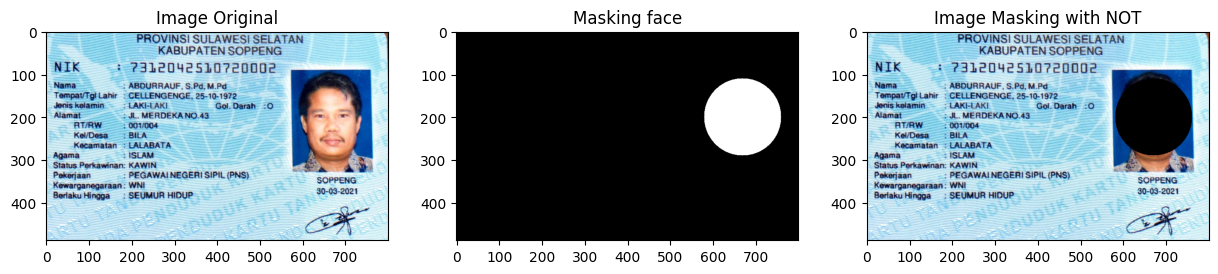

In [39]:
mask = np.zeros(ktp.shape[:2], dtype="uint8")
cv.circle(mask, (670, 200), 90, 255, -1)

mask_not = cv.bitwise_not(mask)
masked_image_not_face = cv.bitwise_and(ktp, ktp, mask=mask_not)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(ktp)
ax[0].set_title('Image Original')

ax[1].imshow(mask, cmap='gray')
ax[1].set_title('Masking face')

ax[2].imshow(masked_image_not_face)
ax[2].set_title('Image Masking with NOT')

plt.show()

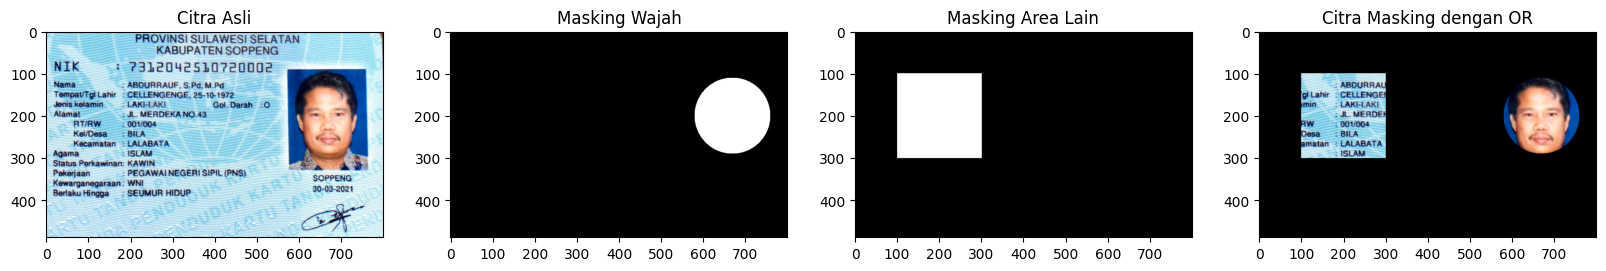

In [40]:
mask_face = np.zeros(ktp.shape[:2], dtype="uint8")
cv.circle(mask_face, (670, 200), 90, 255, -1)

mask_rectangle = np.zeros(ktp.shape[:2], dtype="uint8")
cv.rectangle(mask_rectangle, (100, 100), (300, 300), 255, -1)

mask_combined = cv.bitwise_or(mask_face, mask_rectangle)

masked_image = cv.bitwise_and(ktp, ktp, mask=mask_combined)

fig, ax = plt.subplots(1, 4, figsize=(20, 5))

ax[0].imshow(ktp)
ax[0].set_title('Citra Asli')

ax[1].imshow(mask_face, cmap='gray')
ax[1].set_title('Masking Wajah')

ax[2].imshow(mask_rectangle, cmap='gray')
ax[2].set_title('Masking Area Lain')

ax[3].imshow(masked_image)
ax[3].set_title('Citra Masking dengan OR')

plt.show()

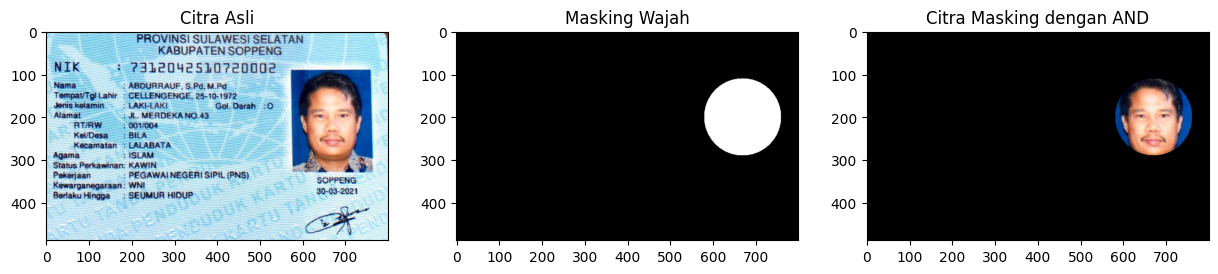

In [41]:
mask = np.zeros(ktp.shape[:2], dtype="uint8")
cv.circle(mask, (670, 200), 90, 255, -1)

masked_image = cv.bitwise_and(ktp, ktp, mask=mask)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(ktp)
ax[0].set_title('Citra Asli')

ax[1].imshow(mask, cmap='gray')
ax[1].set_title('Masking Wajah')

ax[2].imshow(masked_image)
ax[2].set_title('Citra Masking dengan AND')

plt.show()

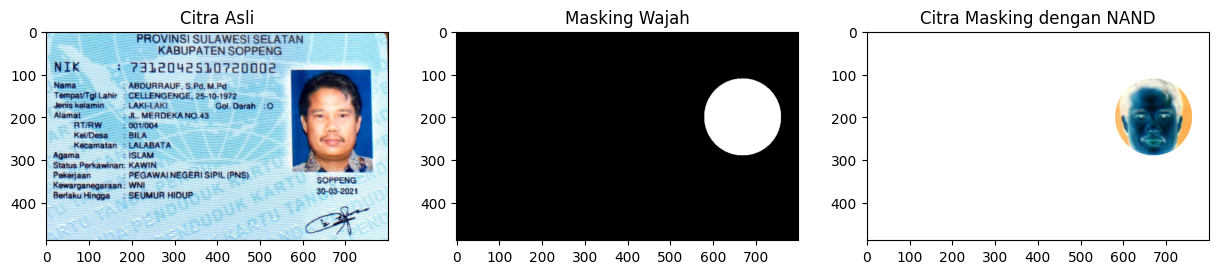

In [42]:
mask = np.zeros(ktp.shape[:2], dtype="uint8")
cv.circle(mask, (670, 200), 90, 255, -1)

masked_image = cv.bitwise_and(ktp, ktp, mask=mask)

nand_masked_image = cv.bitwise_not(masked_image)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(ktp)
ax[0].set_title('Citra Asli')

ax[1].imshow(mask, cmap='gray')
ax[1].set_title('Masking Wajah')

ax[2].imshow(nand_masked_image)
ax[2].set_title('Citra Masking dengan NAND')

plt.show()

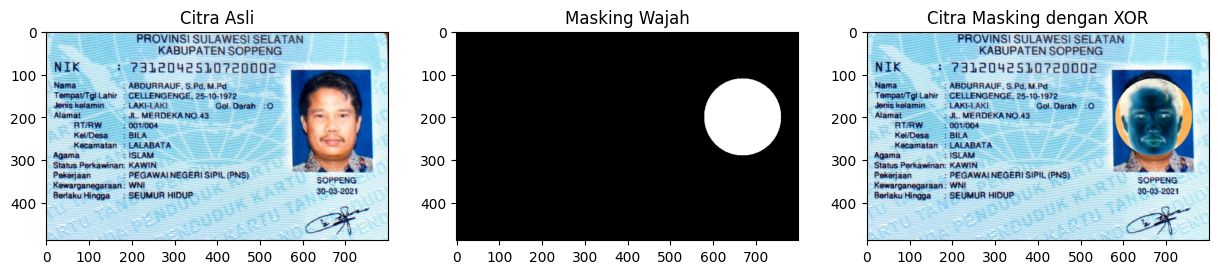

In [44]:
mask = np.zeros(ktp.shape[:2], dtype="uint8")
cv.circle(mask, (670, 200), 90, 255, -1)

mask_colored = cv.merge([mask, mask, mask])

xor_masked_image = cv.bitwise_xor(ktp, mask_colored)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(ktp)
ax[0].set_title('Citra Asli')

ax[1].imshow(mask, cmap='gray')
ax[1].set_title('Masking Wajah')

ax[2].imshow(xor_masked_image)
ax[2].set_title('Citra Masking dengan XOR')

plt.show()

Tuliskan hasil analisa anda:

- Operator NOT mengubah setiap piksel yang terlibat dalam mask menjadi nilai komplementernya (255 menjadi 0, dan sebaliknya). Inilah sebabnya area wajah terlihat seperti bayangan atau efek negatif.
- Operator OR memungkinkan citra yang dihasilkan memunculkan dua area yang dimasking secara bersamaan. Ini mengkombinasikan dua masker, sehingga baik area wajah maupun area persegi terlihat jelas pada citra hasil.
- Operator AND mempertahankan hanya piksel yang berada di dalam area mask, sedangkan piksel di luar area mask diset menjadi 0 (hitam). Ini menjelaskan mengapa hanya area wajah yang terlihat, sementara sisanya hitam.
- Operator NAND menghasilkan efek kebalikan dari AND, di mana area wajah menjadi komplementer (seperti bayangan) sementara bagian luar tetap tidak berubah.
- Operator XOR mengatur piksel di mana nilai mask berbeda dengan citra asli, sehingga citra yang dihasilkan memiliki tampilan kontras yang lebih unik pada area yang di-XOR.